<a href="https://colab.research.google.com/github/algharak/semi-demand-fcst/blob/master/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
!pip install mxnet
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from itertools import islice
from pathlib import Path


In [ ]:
mx.random.seed(0)
np.random.seed(0)

In [ ]:
!pip install gluonts

In [ ]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas
print(f"Available datasets: {list(dataset_recipes.keys())}")

In [ ]:
dataset = get_dataset("m4_monthly", regenerate=True)

In [ ]:
train_entry = next(iter(dataset.train))
#train_entry = next(iter(dataset.train))
aa = train_entry
print (aa['item_id'])
print(train_entry.keys())


In [ ]:
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))
print(train_entry['target'].shape)

print(test_entry['target'].shape)
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))
print(train_entry['target'].shape)

print(test_entry['target'].shape)


In [ ]:
print (type(dataset.metadata))
print (dataset.metadata)


In [ ]:
me=iter(dataset.train)
j = 1
for i in me:
  mef = to_pandas(i)
  print (j)
  print (mef.shape)
  j +=1
print ('i am donr')



In [ ]:

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['Historical Product Demand Short.csv']),parse_dates=["Date"])
df2.head

In [ ]:
df2.shape

In [ ]:
colnames = df2.columns.to_list()
print(type(colnames))
for i in colnames:
  print (i)

In [ ]:
#print (pd.unique(df2['Product_Category']))
prod_categ = list(pd.unique(df2['Product_Category']))
print(type(prod_categ))
print(prod_categ)

In [ ]:
print (df2.head)
print (df2.info())

In [ ]:
start_date = df2['Date'].min()
end_date = df2['Date'].max()
print (start_date,end_date)
print (type(start_date),type(end_date))

In [ ]:
idx = pd.date_range(start=start_date, end=end_date)

In [ ]:
dtdelta = end_date-start_date
nrows = dtdelta.days
print (type(nrows))
ncols = len (prod_categ)
print(nrows,ncols)

In [ ]:
dfnew = pd.DataFrame(np.zeros((nrows+1,ncols),dtype=int),index=idx, columns=prod_categ)
dfnew.head

In [ ]:
import datetime
cat_idx = colnames.index('Product_Category')
dt_idx = colnames.index('Date')
value_idx = colnames.index('Order_Demand')
print(cat_idx)
df2.info()

In [ ]:
print (dfnew.head)
print (type(dfnew.index[1]))

In [ ]:
from tqdm.notebook import tqdm
nr = df2.shape[0]
rng = list(range(nr))
print(nr)
for n in tqdm(rng):
  #df2['Date'] = pd.to_datetime(df2['Date']).dt.date
  #act_date = datetime.datetime.strptime(df2.iloc[n,dt_idx], '%Y-%m-%d').date()
  act_date = df2.iloc[n,dt_idx]
  #print(act_date)
  act_cat = df2.iloc[n,cat_idx]
  #print(act_cat)
  act_value = int(df2.iloc[n,value_idx])
  #print(act_value)
  #print (n)
  #print(dfnew.loc[act_date,act_cat])
  dfnew.loc[act_date,act_cat] += act_value
  #print(dfnew.loc[act_date,act_cat])
print('i am done')

In [ ]:
print (dfnew.values.sum())

In [ ]:
print (df2.head)


In [ ]:
print (df2['Order_Demand'].values.sum())


In [ ]:
print(df2.head)

In [ ]:
dfnew['inx']=dfnew.index
print(dfnew.head)

In [ ]:
import matplotlib.pyplot as plt

dfnew[idx>'01-01-2012'].plot(kind='line',x='inx',y='Category_006',color='red',figsize=(18,3))
plt.show()

In [ ]:
dfnewer = dfnew[['inx','Category_006']].copy()
dfnewer = dfnewer.loc[idx>'01-01-2012']
print (dfnewer.shape)
print (dfnewer.head)
narray = dfnewer.to_numpy()
print(narray.shape)
#narray

In [ ]:
from scipy.fftpack import fft
# Number of samplepoints
N = int(558)
# sample spacing
T = 1.0 / 261.0
#x=np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(narray)
xf= int(len(yf)/2)
#xf = np.linspace(0.0, 1.0/(2.0*T), HN)
import matplotlib.pyplot as plt
plt.plot(range(xf),(2.0/N)*yf[0:xf])
plt.grid()
plt.show()
print(np.argmin(yf))

Now we will convert the format of our dataset to what gluon-ts requires


In [ ]:
from gluonts.dataset.common import ListDataset

In [ ]:
from gluonts.dataset.field_names import FieldName
[f"FieldName.{k} = '{v}'" for k, v in FieldName.__dict__.items() if not k.startswith('_')]


In [172]:
data_out = create_dataset(custom_ds_metadata['num_series'],
                          custom_ds_metadata['num_steps'],
                          custom_ds_metadata['prediction_length']
                         )

target, feat_dynamic_real, feat_static_cat = data_out
print (type(target),target.shape)
target

<class 'numpy.ndarray'> (100, 168)


array([[1.12415713, 0.54187053, 0.54836692, ..., 1.40230099, 1.16233545,
        0.79456676],
       [1.03275387, 0.60673457, 0.65684099, ..., 1.44138215, 1.10479115,
        1.50157383],
       [1.06980819, 0.93262789, 0.8398692 , ..., 1.53635989, 1.701142  ,
        1.35601773],
       ...,
       [1.41629258, 1.23563936, 1.47125488, ..., 0.0648779 , 0.68040528,
        1.57250988],
       [1.64093549, 1.03919243, 1.35492616, ..., 0.45410657, 1.08427483,
        1.10230227],
       [1.41415001, 0.99260206, 1.6380228 , ..., 0.73409424, 0.24804151,
        1.32060278]])

In [170]:
nu_st = 80
nu_ser = dfnewer.shape[0]//nu_st
#nu_ser = round(round(dfnewer.shape[0])/nu_st)
#dfnewer.shape
print(nu_ser)
print(dfnewer.head)
start_date = dfnewer['inx'].min()
print (start_date)

6
<bound method NDFrame.head of                   inx  Category_006
2012-01-02 2012-01-02         13000
2012-01-03 2012-01-03         72400
2012-01-04 2012-01-04        563000
2012-01-05 2012-01-05        843602
2012-01-06 2012-01-06        445723
...               ...           ...
2013-07-08 2013-07-08        803601
2013-07-09 2013-07-09        196212
2013-07-10 2013-07-10        163503
2013-07-11 2013-07-11        221811
2013-07-12 2013-07-12        363108

[558 rows x 2 columns]>
2012-01-02 00:00:00


In [174]:
cus_ds_meta = {'num_series': nu_ser,
                      'num_steps': 80,
                      'prediction_length': 20,
                      'freq': '1D',
                      'start': [pd.Timestamp(start_date, freq='1D')
                                for _ in range(6)]
                     }
print (cus_ds_meta.items())

dict_items([('num_series', 6), ('num_steps', 80), ('prediction_length', 20), ('freq', '1D'), ('start', [Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D')])])


In [ ]:
target = dfnewer['Category_006'].to_numpy()
target = target [len(target)-(6*80):].reshape((nu_ser,-1))
print (target.shape)

In [148]:
train_ds = ListDataset([{FieldName.TARGET: target,
                         FieldName.START: start,
                         FieldName.FEAT_DYNAMIC_REAL: [fdr],
                         FieldName.FEAT_STATIC_CAT: [fsc]}
                        for (target, start, fdr, fsc) in zip(target[:, :-cus_ds_meta['prediction_length']],
                                                             cus_ds_meta['start'],
                                                             feat_dynamic_real[:, :-cus_ds_meta['prediction_length']],
                                                             feat_static_cat)],
                      freq=cus_ds_meta['freq'])

In [149]:
test_ds = ListDataset([{FieldName.TARGET: target,
                        FieldName.START: start,
                        FieldName.FEAT_DYNAMIC_REAL: [fdr],
                        FieldName.FEAT_STATIC_CAT: [fsc]}
                       for (target, start, fdr, fsc) in zip(target,
                                                            cus_ds_meta['start'],
                                                            feat_dynamic_real,
                                                            feat_static_cat)],
                     freq=cus_ds_meta['freq'])

In [177]:
train_entry = next(iter(train_ds))
train_entry.keys()
#train_entry['target']

dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])

In [151]:
test_entry = next(iter(test_ds))
test_entry.values()

dict_values([array([1.09000e+04, 1.15203e+05, 2.53616e+05, 1.89501e+05, 0.00000e+00,
       2.50400e+03, 3.21912e+05, 3.51702e+05, 1.16121e+05, 1.37301e+05,
       3.06606e+05, 0.00000e+00, 2.02500e+05, 4.13262e+05, 2.02110e+05,
       1.24722e+05, 1.08221e+05, 6.25009e+05, 0.00000e+00, 9.05000e+04,
       1.78306e+05, 2.17211e+05, 1.87605e+05, 1.75210e+05, 2.58321e+05,
       6.00000e+01, 0.00000e+00, 3.18605e+05, 1.51797e+05, 2.74216e+05,
       3.12802e+05, 2.07203e+05, 0.00000e+00, 8.50010e+04, 3.28801e+05,
       5.23709e+05, 5.13700e+05, 2.19801e+05, 4.65100e+04, 0.00000e+00,
       0.00000e+00, 8.05100e+04, 1.38030e+05, 2.17905e+05, 2.80000e+04,
       4.43600e+05, 4.00000e+03, 1.00100e+03, 3.57014e+05, 2.24502e+05,
       8.62080e+04, 3.31310e+05, 2.62803e+05, 0.00000e+00, 1.80501e+05,
       3.65421e+05, 8.17010e+04, 3.52745e+05, 1.59010e+05, 3.96101e+05,
       0.00000e+00, 2.70000e+04, 3.99220e+05, 1.99212e+05, 4.27263e+05,
       4.73501e+05, 1.45141e+05, 0.00000e+00, 2.000

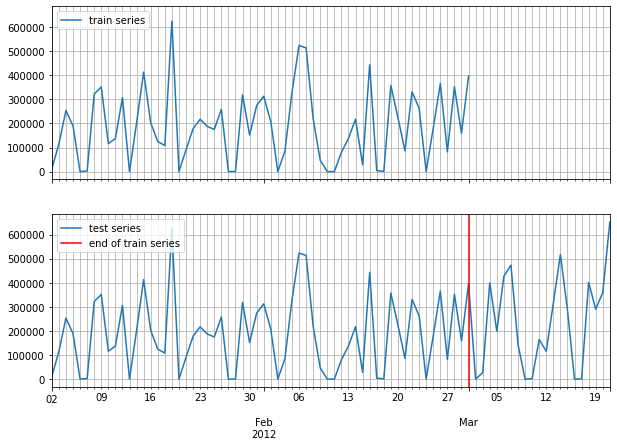

In [152]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [ ]:
train_entry = next(iter(train_ds))
train_entry.keys()
#train_entry['target']
test_entry = next(iter(test_ds))
test_entry.values()
train_entry = next(iter(train_ds))
train_entry.keys()
#train_entry['target']
test_entry = next(iter(test_ds))
test_entry.values()
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [146]:

from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.trainer import Trainer

In [155]:
estimator = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[10],
    prediction_length=cus_ds_meta['prediction_length'],
    context_length=2*cus_ds_meta['prediction_length'],
    freq=cus_ds_meta['freq'],
    trainer=Trainer(ctx="cpu",
                    epochs=5,
                    learning_rate=1e-3,
                    hybridize=False,
                    num_batches_per_epoch=100
                   )
)

In [187]:
print (type(train_ds))


gluonts.dataset.common.ListDataset


In [156]:
predictor = estimator.train(train_ds)

  0%|          | 0/100 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 100/100 [00:01<00:00, 80.60it/s, epoch=5/5, avg_epoch_loss=13.1]


In [157]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [158]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=20,  # number of sample paths we want for evaluation
)

In [160]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [171]:
# first entry of the time series list
ts_entry = tss[5]
print(ts_entry)

                   0
2012-01-02  493906.0
2012-01-03  286801.0
2012-01-04  184020.0
2012-01-05       0.0
2012-01-06       0.0
...              ...
2012-03-17  803601.0
2012-03-18  196212.0
2012-03-19  163503.0
2012-03-20  221811.0
2012-03-21  363108.0

[80 rows x 1 columns]


In [167]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 250
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

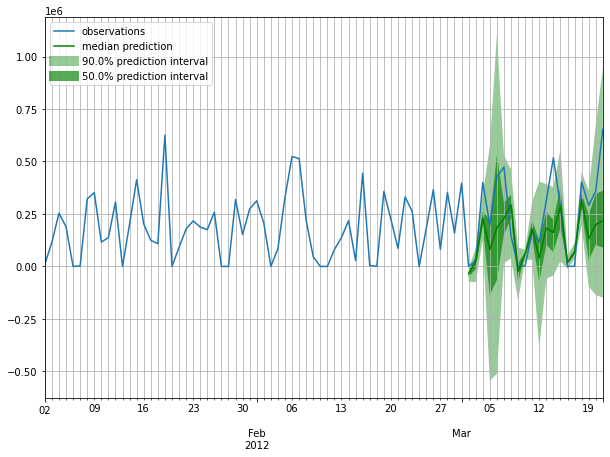

In [168]:
forecast_entry = forecasts[0]
plot_prob_forecasts(ts_entry, forecast_entry)

In [176]:
[pd.Timestamp(start_date, freq='1D') for _ in range(6)]

[Timestamp('2012-01-02 00:00:00', freq='D'),
 Timestamp('2012-01-02 00:00:00', freq='D'),
 Timestamp('2012-01-02 00:00:00', freq='D'),
 Timestamp('2012-01-02 00:00:00', freq='D'),
 Timestamp('2012-01-02 00:00:00', freq='D'),
 Timestamp('2012-01-02 00:00:00', freq='D')]

In [183]:
print([pd.Timestamp(start_date, freq='D') for _ in range(6)])


[Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D')]


In [184]:
print([pd.Timestamp("01-01-2019", freq='1H') for _ in range(100)])

[Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00', freq='H'), Timestamp('2019-01-01 00:00:00'

the following is experiment and needs to be removed


In [190]:
def create_dataset(num_series, num_steps, period=24, mu=1, sigma=0.3):
    # create target: noise + pattern
    # noise
    noise = np.random.normal(mu, sigma, size=(num_series, num_steps))

    # pattern - sinusoid with different phase
    sin_minumPi_Pi = np.sin(np.tile(np.linspace(-np.pi, np.pi, period), int(num_steps / period)))
    sin_Zero_2Pi = np.sin(np.tile(np.linspace(0, 2 * np.pi, 24), int(num_steps / period)))

    pattern = np.concatenate((np.tile(sin_minumPi_Pi.reshape(1, -1),
                                      (int(np.ceil(num_series / 2)),1)),
                              np.tile(sin_Zero_2Pi.reshape(1, -1),
                                      (int(np.floor(num_series / 2)), 1))
                             ),
                             axis=0
                            )

    target = noise + pattern

    # create time features: use target one period earlier, append with zeros
    feat_dynamic_real = np.concatenate((np.zeros((num_series, period)),
                                        target[:, :-period]
                                       ),
                                       axis=1
                                      )

    # create categorical static feats: use the sinusoid type as a categorical feature
    feat_static_cat = np.concatenate((np.zeros(int(np.ceil(num_series / 2))),
                                      np.ones(int(np.floor(num_series / 2)))
                                     ),
                                     axis=0
                                    )

    return target, feat_dynamic_real, feat_static_cat

In [191]:
custom_ds_metadata = {'num_series': 100,
                      'num_steps': 24 * 7,
                      'prediction_length': 24,
                      'freq': '1H',
                      'start': [pd.Timestamp("01-01-2019", freq='1H')
                                for _ in range(100)]
                     }

In [218]:

data_out = create_dataset(custom_ds_metadata['num_series'],
                          custom_ds_metadata['num_steps'],
                          custom_ds_metadata['prediction_length']
                         )

target, feat_dynamic_real, feat_static_cat = data_out

In [195]:
print (type(target))
print (target.shape)


<class 'numpy.ndarray'>
(100, 168)


In [ ]:
print(target[:,:-3])
print (target[0])
print (target[1])
print (target[2])

In [196]:
train_ds = ListDataset([{FieldName.TARGET: target,
                         FieldName.START: start,
                         FieldName.FEAT_DYNAMIC_REAL: [fdr],
                         FieldName.FEAT_STATIC_CAT: [fsc]}
                        for (target, start, fdr, fsc) in zip(target[:, :-custom_ds_metadata['prediction_length']],
                                                             custom_ds_metadata['start'],
                                                             feat_dynamic_real[:, :-custom_ds_metadata['prediction_length']],
                                                             feat_static_cat)],
                      freq=custom_ds_metadata['freq'])

In [222]:
for x in target[:, :-5]:
  print (x)

[ 1.07249973  0.58506084  0.63337869  0.07738553  0.39036438 -0.03253258
  0.19620965 -0.03037548  0.32677986  0.3237368   0.89783911  0.99648206
  1.31620721  1.42454855  1.14903639  1.4873191   2.25329318  1.83814933
  2.39849024  1.42935396  1.6722114   1.27731094  1.37138408  1.02990302
  0.74115847  0.94256688  0.40814671  0.03072285 -0.09238584 -0.26048333
  0.32233202  0.46849615 -0.29954547  0.78107911  0.9947454   0.26078792
  1.39577633  1.92468968  1.72345837  1.43158453  1.8416298   2.35821277
  2.22134075  1.8999145   1.89555844  1.49016437  1.34317066  0.67185518
  1.06539673  1.02427664  0.82940555  0.83123474 -0.18031355  0.23273236
 -0.20101725 -0.07536165 -0.0720342   0.4975667   0.69318926  1.08267337
  1.32374175  0.89960042  2.32213846  2.07800395  1.94394709  1.70064068
  1.64440299  1.93652724  1.75427041  1.55100601  1.12295055  1.0231401
  0.55756113  1.00097737  0.49402241  0.85698185  0.17908586  0.38577336
  0.06437901  0.54939408  0.2037577  -0.06621494  1.

In [203]:
for i in range(10):
  train_entry = next(iter(train_ds))
  print(train_entry.keys())
  print(train_entry['target'])

dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])
[ 1.0767901   1.1728646   0.53755426  0.28113824 -0.5873369   0.06153129
  0.10811865  0.37374547  0.06005669  0.27894667  0.7494635   0.86426175
  1.4708922   1.3267168   1.4618827   1.6343133   2.144506    1.4748523
  2.2379787   1.5477308   2.134133    1.4033588   1.7367632   1.334207
  1.2926246   0.2458617  -0.11271168  0.14363408 -0.23480883  0.42183977
 -0.09283356  0.40024668  0.5571321   0.60934967  0.28015268  0.7083427
  0.7489426   0.96872187  1.3552514   2.2724326   2.0011392   1.7360094
  2.0270422   2.1935155   1.5863854   1.8449476   0.83592975  1.2898393
  0.9565507   0.14832267  0.6187869   0.50740093  0.29444483  0.19287683
  0.15698518  0.38065356  0.32401952  0.35586843  0.61228913  0.8975514
  0.8669707   1.2345355   1.2289898   1.942675    1.3324529   1.7199543
  1.7754208   2.2696922   2.0843706   1.633735    1.7308253   0.8420567
  0.8154877   0.72503775  0.4381237   0.63242644  0.